In [1]:
# Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [2]:
# read the files into pandas
recipe_df = pd.read_csv('drive/MyDrive/RAW_recipes.csv')
users_df = pd.read_csv('drive/MyDrive/RAW_interactions.csv')

In [3]:
# shape of the data
print('The shape of the recipe dataset is ',recipe_df.shape)
print('The shape of the users dataset is ',users_df.shape)

The shape of the recipe dataset is  (231637, 12)
The shape of the users dataset is  (1132367, 5)


In [4]:
# Understand recipes dataset
recipe_df.head()

,name,id,minutes,contributor_id,submitted,tags,nutrition,n_steps,steps,description,ingredients,n_ingredients
0,arriba baked winter squash mexican style,137739,55,47892,2005-09-16,"['60-minutes-or-less', 'time-to-make', 'course...","[51.5, 0.0, 13.0, 0.0, 2.0, 0.0, 4.0]",11,"['make a choice and proceed with recipe', 'dep...",autumn is my favorite time of year to cook! th...,"['winter squash', 'mexican seasoning', 'mixed ...",7
1,a bit different breakfast pizza,31490,30,26278,2002-06-17,"['30-minutes-or-less', 'time-to-make', 'course...","[173.4, 18.0, 0.0, 17.0, 22.0, 35.0, 1.0]",9,"['preheat oven to 425 degrees f', 'press dough...",this recipe calls for the crust to be prebaked...,"['prepared pizza crust', 'sausage patty', 'egg...",6
2,all in the kitchen chili,112140,130,196586,2005-02-25,"['time-to-make', 'course', 'preparation', 'mai...","[269.8, 22.0, 32.0, 48.0, 39.0, 27.0, 5.0]",6,"['brown ground beef in large pot', 'add choppe...",this modified version of 'mom's' chili was a h...,"['ground beef', 'yellow onions', 'diced tomato...",13
3,alouette potatoes,59389,45,68585,2003-04-14,"['60-minutes-or-less', 'time-to-make', 'course...","[368.1, 17.0, 10.0, 2.0, 14.0, 8.0, 20.0]",11,['place potatoes in a large pot of lightly sal...,"this is a super easy, great tasting, make ahea...","['spreadable cheese with garlic and herbs', 'n...",11
4,amish tomato ketchup for canning,44061,190,41706,2002-10-25,"['weeknight', 'time-to-make', 'course', 'main-...","[352.9, 1.0, 337.0, 23.0, 3.0, 0.0, 28.0]",5,['mix all ingredients& boil for 2 1 / 2 hours ...,my dh's amish mother raised him on this recipe...,"['tomato juice', 'apple cider vinegar', 'sugar...",8



- **name** 	The name of the recipe.
- **id**	The unique identifier of the recipe.
- **minutes**	The total cooking and preparation time in minutes.
- **contributor_id**	The unique identifier of the user who submitted the recipe
- **submitted**	The date when the recipe was submitted.
- **tags**	Tags or labels associated with the recipe (e.g., vegetarian, vegan, dessert).
- **nutrition**	Nutritional information (i.e. calories (#), total fat (PDV), sugar (PDV) , sodium (PDV) , protein (PDV) , saturated fat (PDV), carbohydrates (PDV)).
- **n_steps**	The total number of steps or instructions in the recipe.
- **steps**	The step-by-step instructions for preparing the recipe.
- **description**	A brief description or summary of the recipe.
**ingredients**	The list of ingredients required for the recipe.
-**n_ingredients**	The total number of ingredients used in the recipe.

In [5]:
# Understand recipes dataset
users_df.head()

,user_id,recipe_id,date,rating,review
0,38094,40893,2003-02-17,4,Great with a salad. Cooked on top of stove for...
1,1293707,40893,2011-12-21,5,"So simple, so delicious! Great for chilly fall..."
2,8937,44394,2002-12-01,4,This worked very well and is EASY. I used not...
3,126440,85009,2010-02-27,5,I made the Mexican topping and took it to bunk...
4,57222,85009,2011-10-01,5,"Made the cheddar bacon topping, adding a sprin..."


- **user_id**	The unique identifier of the user.
- **recipe_id**	The unique identifier of the recipe associated with the user's interaction.
- **date**	The date when the user's interaction took place.
- **rating**	The rating given by the user for the recipe.
- **review**	The review or feedback provided by the user for the recipe.

In [6]:
# checking Missing Value in recipe dataset
recipe_df.isnull().sum()

,0
name,1
id,0
minutes,0
contributor_id,0
submitted,0
tags,0
nutrition,0
n_steps,0
steps,0
description,4979


In [7]:
# There is only one missing value in name so we simply drop row from the dataset
recipe_df.dropna(subset=['name'],inplace=True)

The Description are Written by the recipe contributors it is not feasible to impute missing values for the description columns. lets us look at the extent to which these missing values constitute the overall dataset

In [8]:
print('Missing values', round(recipe_df.isna().sum().sum()/recipe_df.shape[0]*100, 2), "%", "of the overall data.")

Missing values 2.15 % of the overall data.


In [9]:
# drop the rows with missing value in description
recipe_df.dropna(subset=['description'],inplace=True)

In [10]:
# cheking
recipe_df.isnull().sum()

,0
name,0
id,0
minutes,0
contributor_id,0
submitted,0
tags,0
nutrition,0
n_steps,0
steps,0
description,0


In [11]:
# checking Missing Value in users dataset
users_df.isnull().sum()

,0
user_id,0
recipe_id,0
date,0
rating,0
review,169


Similar to the 'description' column in the recipes dataset, as the reviews are written by users themselves , it is not feasible to impute missing values for the 'review' column. so we simply drop the missing row.

In [12]:
# drop the rows with missing value in review
users_df.dropna(subset=['review'],inplace=True)

In [13]:
# checking
users_df.isnull().sum()

,0
user_id,0
recipe_id,0
date,0
rating,0
review,0


In [14]:
# Checking Duplicate rows Data
print("duplicated rows in recipes dataset:", recipe_df.duplicated().sum())
print("duplicated rows in user interactions dataset:", users_df.duplicated().sum())


duplicated rows in recipes dataset: 0
duplicated rows in user interactions dataset: 0


In [15]:
# Statistics Summary For Recipe Dataset
recipe_df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,226657.0,2.260976e+05,1.398026e+05,38.0,105707.0,211971.0,336737.0,5.377160e+05
minutes,226657.0,9.602472e+03,4.510715e+06,0.0,20.0,40.0,65.0,2.147484e+09
contributor_id,226657.0,5.655471e+06,1.008784e+08,27.0,58104.0,180789.0,409106.0,2.002290e+09
n_steps,226657.0,9.773927e+00,5.999824e+00,0.0,6.0,9.0,12.0,1.450000e+02
n_ingredients,226657.0,9.054170e+00,3.740942e+00,1.0,6.0,9.0,11.0,4.300000e+01


The dataset exhibits significant variability in minutes,n_steps and ingredients Lets create box plot to understand better

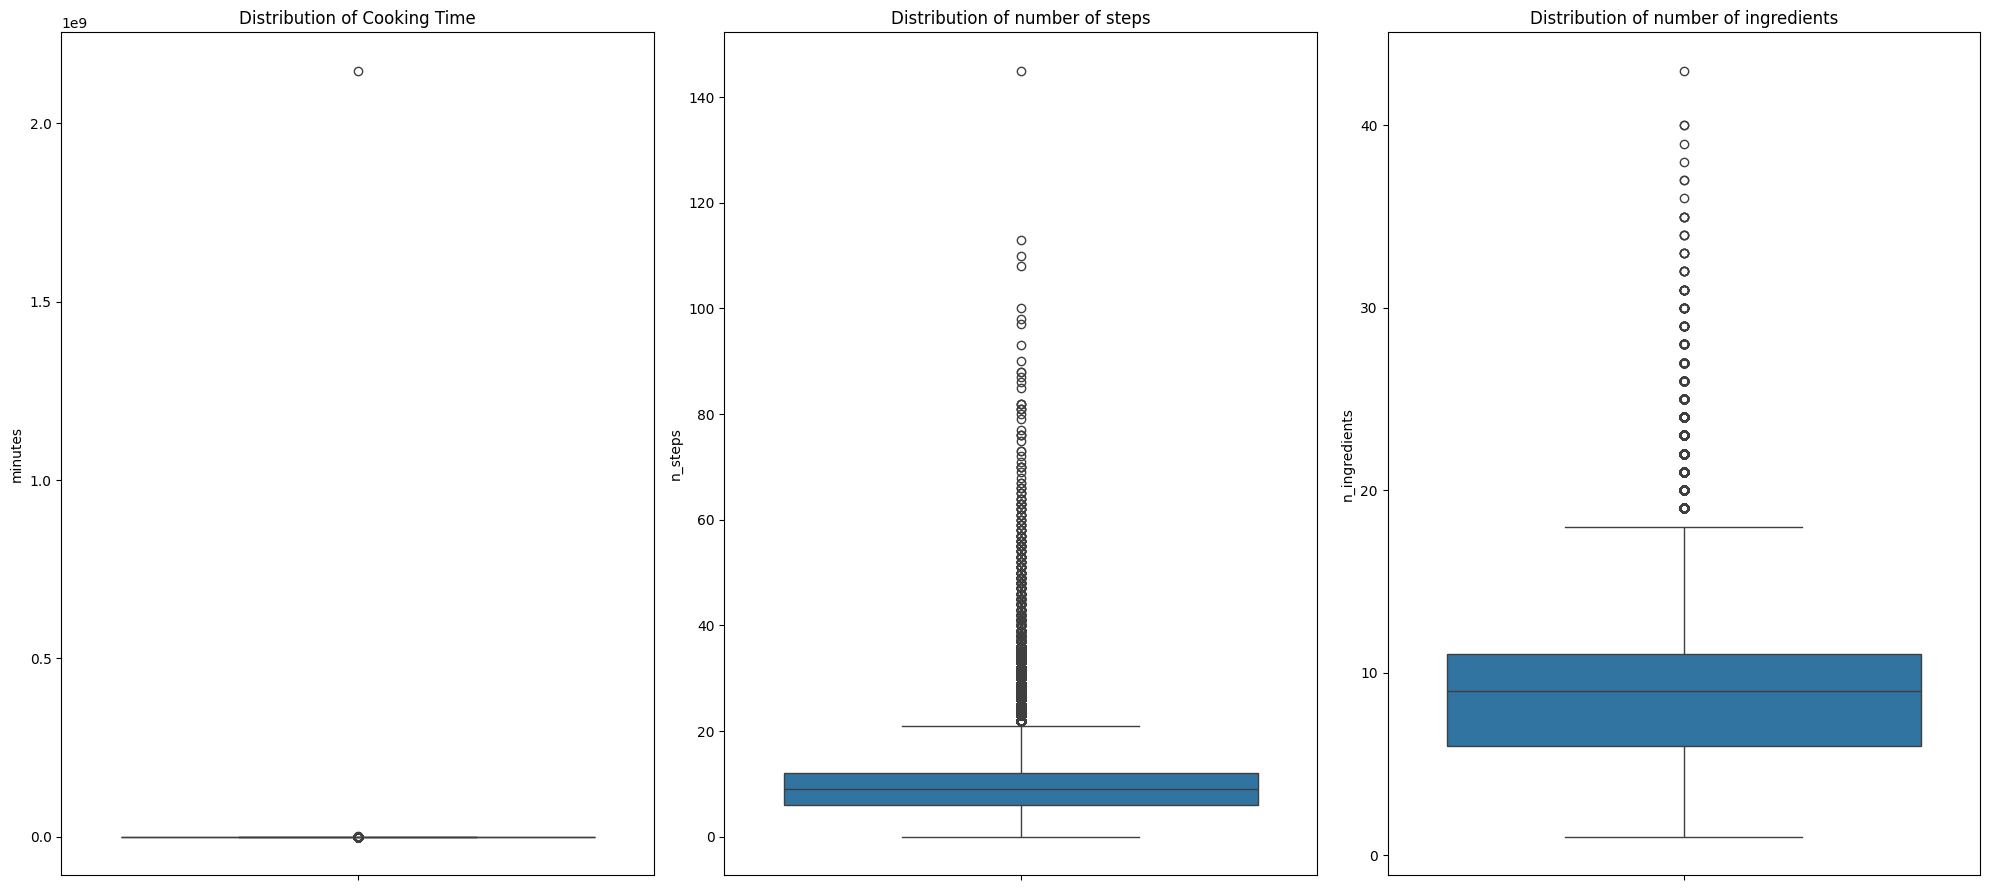

In [16]:
# Boxplot
fig ,ax = plt.subplots(1,3,figsize=(20,9))
sns.boxplot(data=recipe_df['minutes'],ax=ax[0])
ax[0].set_title('Distribution of Cooking Time')

sns.boxplot(data=recipe_df['n_steps'],ax=ax[1])
ax[1].set_title('Distribution of number of steps')

sns.boxplot(data=recipe_df['n_ingredients'],ax=ax[2])
ax[2].set_title('Distribution of number of ingredients')

plt.tight_layout()
plt.show()

In [17]:
# Minutes
# Calculate the first quartile, third quartile and the interquartile range
Q1 = recipe_df['minutes'].quantile(0.25)
Q3 = recipe_df['minutes'].quantile(0.75)
IQR = Q3 - Q1

# Calculate the maximum value and minimum values according to the Tukey rule
max_value = Q3 + 1.5 * IQR
min_value = Q1 - 1.5 * IQR

# Filter the data for values that are greater than max_value or less than min_value
minutes_outliers = recipe_df[(recipe_df['minutes'] > max_value) | (recipe_df['minutes'] < min_value)]
minutes_outliers.sort_values('minutes')

,name,id,minutes,contributor_id,submitted,tags,nutrition,n_steps,steps,description,ingredients,n_ingredients
206778,sweet rice pudding,454411,133,1889545,2011-04-25,"['time-to-make', 'course', 'main-ingredient', ...","[338.6, 12.0, 185.0, 3.0, 16.0, 20.0, 19.0]",23,"['place the rice in a medium-sized bowl', 'fil...",this is a traditional recipe from india and it...,"['basmati rice', 'whole milk', 'granulated sug...",7
204465,super soft bread machine rolls with wheat germ,210241,133,260718,2007-02-09,"['time-to-make', 'course', 'main-ingredient', ...","[1580.3, 93.0, 106.0, 92.0, 83.0, 171.0, 71.0]",7,"['in bread machine pan , put in the following ...",this recipe is adapted from the buttery bread ...,"['milk', 'vanilla essence', 'butter', 'sugar',...",9
94271,gooey butter cookies,34390,133,43121,2002-07-16,"['weeknight', 'time-to-make', 'course', 'prepa...","[163.3, 14.0, 49.0, 8.0, 3.0, 23.0, 5.0]",8,"['cream together cream cheese and butter', 'ad...",so easy to make and always a hit!,"['cream cheese', 'butter', 'egg', 'vanilla', '...",6
212812,the world s best sugar cookies,24608,134,37036,2002-04-08,"['weeknight', 'time-to-make', 'course', 'prepa...","[84.8, 8.0, 16.0, 2.0, 1.0, 9.0, 2.0]",15,"['preheat oven to 375f', 'beat oil and butter ...","i found this recipe in the houston chronicle, ...","['vegetable oil', 'butter', 'powdered sugar', ...",10
7738,applebees chicken fajita rollup,499336,134,1072593,2013-04-22,"['time-to-make', 'course', 'main-ingredient', ...","[929.3, 62.0, 77.0, 272.0, 107.0, 78.0, 29.0]",18,['comgine the marinade ingredients in a medium...,todd wilbur's recipe for applebees chicken faj...,"['water', 'soy sauce', 'sugar', 'salt', 'white...",30
...,...,...,...,...,...,...,...,...,...,...,...,...
106963,homemade vanilla,425681,259205,28177,2010-05-16,"['time-to-make', 'preparation', '5-ingredients...","[69.4, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]",9,['slice the vanilla beans length-wise and scra...,found this recipe on tammy's blog (http://www....,"['vanilla beans', 'vodka']",2
38116,celtic druid s honey mead meade metheglin,216215,259260,242729,2007-03-11,"['time-to-make', 'course', 'main-ingredient', ...","[531.0, 0.0, 561.0, 1.0, 1.0, 0.0, 47.0]",18,"['equipement:', 'very large pan - to hold 12 p...","mead, made from fermented honey, was the earli...","['gingerroot', 'lemons, juice and rind of', 'w...",7
106563,homemade fruit liquers,291571,288000,553251,2008-03-12,"['time-to-make', 'course', 'main-ingredient', ...","[836.2, 0.0, 333.0, 0.0, 0.0, 0.0, 27.0]",12,"['rinse the fruit or berries , fruit must be c...",this should be a nice easy project for those w...,"['berries', 'vodka', 'granulated sugar']",3
109624,how to preserve a husband,447963,1051200,576273,2011-02-01,"['time-to-make', 'course', 'preparation', 'for...","[407.4, 57.0, 50.0, 1.0, 7.0, 115.0, 5.0]",9,"['be careful in your selection', ""don't choose...","found this in a local wyoming cookbook ""a coll...","['cream', 'peach']",2


In [18]:
minutes_outliers.sort_values('minutes').tail()

,name,id,minutes,contributor_id,submitted,tags,nutrition,n_steps,steps,description,ingredients,n_ingredients
106963,homemade vanilla,425681,259205,28177,2010-05-16,"['time-to-make', 'preparation', '5-ingredients...","[69.4, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]",9,['slice the vanilla beans length-wise and scra...,found this recipe on tammy's blog (http://www....,"['vanilla beans', 'vodka']",2
38116,celtic druid s honey mead meade metheglin,216215,259260,242729,2007-03-11,"['time-to-make', 'course', 'main-ingredient', ...","[531.0, 0.0, 561.0, 1.0, 1.0, 0.0, 47.0]",18,"['equipement:', 'very large pan - to hold 12 p...","mead, made from fermented honey, was the earli...","['gingerroot', 'lemons, juice and rind of', 'w...",7
106563,homemade fruit liquers,291571,288000,553251,2008-03-12,"['time-to-make', 'course', 'main-ingredient', ...","[836.2, 0.0, 333.0, 0.0, 0.0, 0.0, 27.0]",12,"['rinse the fruit or berries , fruit must be c...",this should be a nice easy project for those w...,"['berries', 'vodka', 'granulated sugar']",3
109624,how to preserve a husband,447963,1051200,576273,2011-02-01,"['time-to-make', 'course', 'preparation', 'for...","[407.4, 57.0, 50.0, 1.0, 7.0, 115.0, 5.0]",9,"['be careful in your selection', ""don't choose...","found this in a local wyoming cookbook ""a coll...","['cream', 'peach']",2
144074,no bake granola balls,261647,2147483647,464080,2007-10-26,"['60-minutes-or-less', 'time-to-make', 'course...","[330.3, 23.0, 110.0, 4.0, 15.0, 24.0, 15.0]",9,"['preheat the oven to 350 degrees', 'spread oa...",healthy snacks that kids (and grown ups) will ...,"['rolled oats', 'unsweetened dried shredded co...",8



The dataset includes an extreme outlier with a preparation time of 1,051,200 minutes, which corresponds to the recipe 'No Bake Granola Balls'. Upon further investigation, it appears that this value may be the result of a data collection error or scraping issue. To address this, we will manually input the correct preparation time for the 'No Bake Granola Balls' recipe based on reliable sources. While this recipe might possess unique value or significance, for the purpose of this exploration, we will exclude it from further analysis.

In [19]:
# Replace thie cooking time with 25 minutes
recipe_df.loc[recipe_df['id'] == '261647', 'minutes'] = 25

# Remove row
raw_recipes_df = recipe_df[recipe_df['id'] != '447963']


In [20]:
# Number of steps
# Calculate the first quartile, third quartile and the interquartile range
Q1 = recipe_df['n_steps'].quantile(0.25)
Q3 = recipe_df['n_steps'].quantile(0.75)
IQR = Q3 - Q1

# Calculate the maximum value and minimum values according to the Tukey rule
max_value = Q3 + 1.5 * IQR
min_value = Q1 - 1.5 * IQR

# Filter the data for values that are greater than max_value or less than min_value
nsteps_outliers = recipe_df[(recipe_df['n_steps'] > max_value) | (recipe_df['n_steps'] < min_value)]
nsteps_outliers.sort_values('n_steps')

,name,id,minutes,contributor_id,submitted,tags,nutrition,n_steps,steps,description,ingredients,n_ingredients
40072,cheesy black bean triangles,384208,33,863930,2009-08-04,"['weeknight', '60-minutes-or-less', 'time-to-m...","[558.3, 50.0, 16.0, 56.0, 60.0, 99.0, 12.0]",22,"['cut up yams into cubes and boil app', '20 mi...",unusual and delicious for appetizer or lunch. ...,"['black beans', 'green onions', 'garlic cloves...",11
40113,cheesy broccoli pockets,87322,50,49304,2004-03-23,"['60-minutes-or-less', 'time-to-make', 'course...","[80.2, 8.0, 2.0, 12.0, 11.0, 13.0, 0.0]",22,"['preheat oven to 375 drgrees', 'grease 2 baki...",these make a nice lunch or snack. if you have ...,"['frozen chopped broccoli', 'olive oil', 'garl...",10
190651,snowflake cookies,332867,42,465829,2008-10-26,"['60-minutes-or-less', 'time-to-make', 'course...","[1182.6, 108.0, 118.0, 25.0, 27.0, 219.0, 41.0]",22,"['before you start , grease two cookie sheets ...","this recipe is from ""the little book of christ...","['butter', 'powdered sugar', 'all-purpose flou...",5
190720,so easy pizza dough,401562,50,1263239,2009-11-28,"['60-minutes-or-less', 'time-to-make', 'course...","[329.4, 11.0, 9.0, 24.0, 15.0, 5.0, 18.0]",22,"['1', 'dissolve yeast in water', 'let stand 5 ...",i love this pizza dough! it is so quick and ea...,"['active dry yeast', 'warm water', 'all-purpos...",7
190887,soft burger buns,482252,135,1815704,2012-07-05,"['time-to-make', 'course', 'cuisine', 'prepara...","[416.3, 11.0, 20.0, 16.0, 20.0, 5.0, 25.0]",22,"['mix sugar with 250 g', 'of water', 'add yeas...",fluffy soft burger buns garunteed to suit ever...,"['all-purpose flour', 'salt', 'active dry yeas...",6
...,...,...,...,...,...,...,...,...,...,...,...,...
70088,death by chocolate a la trellis,356724,1680,467583,2009-02-19,"['time-to-make', 'course', 'main-ingredient', ...","[1460.8, 189.0, 262.0, 14.0, 50.0, 380.0, 36.0]",100,"['take a deep breath', ""make sure that you wil...",warning: this dessert is not meant to be eaten...,"['egg whites', 'cream of tartar', 'salt', 'gra...",19
1627,5 cheese crab lasagna with roasted garlic and ...,65007,245,87300,2003-06-18,"['weeknight', 'time-to-make', 'course', 'main-...","[442.8, 35.0, 27.0, 33.0, 50.0, 60.0, 10.0]",108,['roast garlic: place oven rack on second notc...,"this creamy, gooey, gorgeous white lasagna wil...","['garlic', 'extra virgin olive oil', 'dry whit...",24
51532,chocolate raspberry ruffle cake,156874,1080,10033,2006-02-21,"['time-to-make', 'course', 'main-ingredient', ...","[5080.8, 616.0, 967.0, 25.0, 147.0, 1211.0, 12...",110,['first of all: these are not typical directio...,"alice medrich recipe, found in baking with jul...","['unsalted butter', 'pure vanilla extract', 'a...",13
51528,chocolate raspberry mousse truffle cake rasp...,192468,240,232669,2006-10-27,"['time-to-make', 'course', 'main-ingredient', ...","[697.4, 57.0, 249.0, 9.0, 13.0, 105.0, 29.0]",113,"['make the chocolate sour cream cake:', 'prehe...","this recipe is the winner, hands down! just in...","['cake flour', 'baking soda', 'salt', 'godiva ...",24


There  are 9837 outliers and no recipes take 145 ,113 etc steps to make so we only take the data    that  have  less than 30 steps  and  greater than 0

In [21]:
recipe_df = recipe_df[recipe_df['n_steps'] < 30]
recipe_df = recipe_df[recipe_df['n_steps'] > 0]

In [22]:
users_df

,user_id,recipe_id,date,rating,review
0,38094,40893,2003-02-17,4,Great with a salad. Cooked on top of stove for...
1,1293707,40893,2011-12-21,5,"So simple, so delicious! Great for chilly fall..."
2,8937,44394,2002-12-01,4,This worked very well and is EASY. I used not...
3,126440,85009,2010-02-27,5,I made the Mexican topping and took it to bunk...
4,57222,85009,2011-10-01,5,"Made the cheddar bacon topping, adding a sprin..."
...,...,...,...,...,...
1132362,116593,72730,2003-12-09,0,Another approach is to start making sauce with...
1132363,583662,386618,2009-09-29,5,These were so delicious! My husband and I tru...
1132364,157126,78003,2008-06-23,5,WOW! Sometimes I don't take the time to rate ...
1132365,53932,78003,2009-01-11,4,Very good! I used regular port as well. The ...


# Let us now explore the user interactions dataset to gain insights into the ratings.

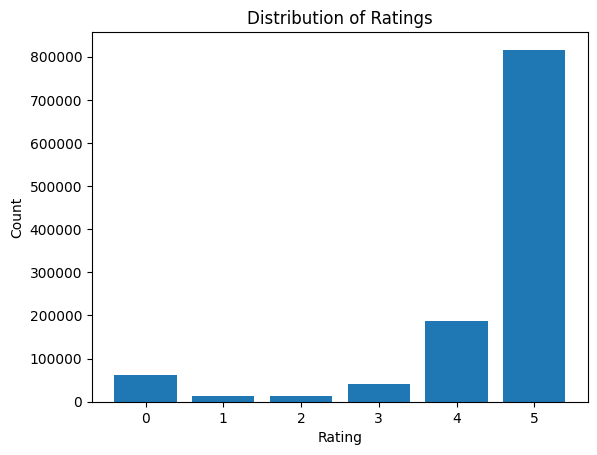

In [23]:
# Distribution of rating
rating_counts = users_df['rating'].value_counts().sort_index()
rating = rating_counts.index
counts = rating_counts.values

plt.bar(rating,counts)
plt.xlabel('Rating')
plt.ylabel('Count')
plt.title('Distribution of Ratings')
plt.show()

After completing the data cleaning phase, we will proceed to the data preprocessing stage.

# Feature Engineering
The 'nutrition' column in the dataframe consists of a list of values representing various nutritional metrics, including calories, total fat, sugar, sodium, protein, saturated fat, and carbohydrates. To facilitate further analysis, we have split these values and created new columns to capture each nutritional metric individually

In [24]:
# Split the values in the 'nutrition' column into separate columns
nutrition_columns = ['calories', 'total_fat', 'sugar', 'sodium', 'protein', 'saturated_fat', 'carbohydrates']

for column in nutrition_columns:
    recipe_df[column] = recipe_df['nutrition'].apply(lambda x: eval(x)[nutrition_columns.index(column)])

# Drop the original 'nutrition' column
recipe_df.drop('nutrition', axis=1, inplace=True)

In [25]:
# View The Dataset
recipe_df.head()

,name,id,minutes,contributor_id,submitted,tags,n_steps,steps,description,ingredients,n_ingredients,calories,total_fat,sugar,sodium,protein,saturated_fat,carbohydrates
0,arriba baked winter squash mexican style,137739,55,47892,2005-09-16,"['60-minutes-or-less', 'time-to-make', 'course...",11,"['make a choice and proceed with recipe', 'dep...",autumn is my favorite time of year to cook! th...,"['winter squash', 'mexican seasoning', 'mixed ...",7,51.5,0.0,13.0,0.0,2.0,0.0,4.0
1,a bit different breakfast pizza,31490,30,26278,2002-06-17,"['30-minutes-or-less', 'time-to-make', 'course...",9,"['preheat oven to 425 degrees f', 'press dough...",this recipe calls for the crust to be prebaked...,"['prepared pizza crust', 'sausage patty', 'egg...",6,173.4,18.0,0.0,17.0,22.0,35.0,1.0
2,all in the kitchen chili,112140,130,196586,2005-02-25,"['time-to-make', 'course', 'preparation', 'mai...",6,"['brown ground beef in large pot', 'add choppe...",this modified version of 'mom's' chili was a h...,"['ground beef', 'yellow onions', 'diced tomato...",13,269.8,22.0,32.0,48.0,39.0,27.0,5.0
3,alouette potatoes,59389,45,68585,2003-04-14,"['60-minutes-or-less', 'time-to-make', 'course...",11,['place potatoes in a large pot of lightly sal...,"this is a super easy, great tasting, make ahea...","['spreadable cheese with garlic and herbs', 'n...",11,368.1,17.0,10.0,2.0,14.0,8.0,20.0
4,amish tomato ketchup for canning,44061,190,41706,2002-10-25,"['weeknight', 'time-to-make', 'course', 'main-...",5,['mix all ingredients& boil for 2 1 / 2 hours ...,my dh's amish mother raised him on this recipe...,"['tomato juice', 'apple cider vinegar', 'sugar...",8,352.9,1.0,337.0,23.0,3.0,0.0,28.0


For both the recipe submission and recipe review, we will extract the month and year variables.

In [26]:
# Convert the 'submitted' column to datetime
recipe_df['submitted'] = pd.to_datetime(recipe_df['submitted'], errors='coerce')

# Extract month and year in recipe dataset
recipe_df['submitted_month'] = recipe_df['submitted'].dt.month
recipe_df['submitted_year'] = recipe_df['submitted'].dt.year

In [27]:
# Convert 'date' column to datetime format in users dataset
users_df['date'] = pd.to_datetime(users_df['date'], errors='coerce')

# Extract month and year into separate columns
users_df['month'] = users_df['date'].dt.month
users_df['year'] = users_df['date'].dt.year


In [28]:
# Now Detleting Both Submitted and Review Date Columns
recipe_df.drop(['submitted'],axis=1,inplace=True)
users_df.drop(['date'],axis=1,inplace=True)

In [29]:
recipe_df.head()

,name,id,minutes,contributor_id,tags,n_steps,steps,description,ingredients,n_ingredients,calories,total_fat,sugar,sodium,protein,saturated_fat,carbohydrates,submitted_month,submitted_year
0,arriba baked winter squash mexican style,137739,55,47892,"['60-minutes-or-less', 'time-to-make', 'course...",11,"['make a choice and proceed with recipe', 'dep...",autumn is my favorite time of year to cook! th...,"['winter squash', 'mexican seasoning', 'mixed ...",7,51.5,0.0,13.0,0.0,2.0,0.0,4.0,9,2005
1,a bit different breakfast pizza,31490,30,26278,"['30-minutes-or-less', 'time-to-make', 'course...",9,"['preheat oven to 425 degrees f', 'press dough...",this recipe calls for the crust to be prebaked...,"['prepared pizza crust', 'sausage patty', 'egg...",6,173.4,18.0,0.0,17.0,22.0,35.0,1.0,6,2002
2,all in the kitchen chili,112140,130,196586,"['time-to-make', 'course', 'preparation', 'mai...",6,"['brown ground beef in large pot', 'add choppe...",this modified version of 'mom's' chili was a h...,"['ground beef', 'yellow onions', 'diced tomato...",13,269.8,22.0,32.0,48.0,39.0,27.0,5.0,2,2005
3,alouette potatoes,59389,45,68585,"['60-minutes-or-less', 'time-to-make', 'course...",11,['place potatoes in a large pot of lightly sal...,"this is a super easy, great tasting, make ahea...","['spreadable cheese with garlic and herbs', 'n...",11,368.1,17.0,10.0,2.0,14.0,8.0,20.0,4,2003
4,amish tomato ketchup for canning,44061,190,41706,"['weeknight', 'time-to-make', 'course', 'main-...",5,['mix all ingredients& boil for 2 1 / 2 hours ...,my dh's amish mother raised him on this recipe...,"['tomato juice', 'apple cider vinegar', 'sugar...",8,352.9,1.0,337.0,23.0,3.0,0.0,28.0,10,2002


In [30]:
# Create 5 new features for diet preference
recipe_df['dairy-free'] = recipe_df['tags'].apply(lambda x: 1 if 'dairy-free' in x else 0)
recipe_df['gluten-free'] = recipe_df['tags'].apply(lambda x: 1 if 'gluten-free' in x else 0)
recipe_df['low-carb'] = recipe_df['tags'].apply(lambda x: 1 if 'low-carb' in x else 0)
recipe_df['vegan'] = recipe_df['tags'].apply(lambda x: 1 if 'vegan' in x else 0)
recipe_df['vegetarian'] = recipe_df['tags'].apply(lambda x: 1 if 'vegetarian' in x else 0)

In [31]:
# view recipe dataset
recipe_df.head()

,name,id,minutes,contributor_id,tags,n_steps,steps,description,ingredients,n_ingredients,...,protein,saturated_fat,carbohydrates,submitted_month,submitted_year,dairy-free,gluten-free,low-carb,vegan,vegetarian
0,arriba baked winter squash mexican style,137739,55,47892,"['60-minutes-or-less', 'time-to-make', 'course...",11,"['make a choice and proceed with recipe', 'dep...",autumn is my favorite time of year to cook! th...,"['winter squash', 'mexican seasoning', 'mixed ...",7,...,2.0,0.0,4.0,9,2005,0,0,0,0,1
1,a bit different breakfast pizza,31490,30,26278,"['30-minutes-or-less', 'time-to-make', 'course...",9,"['preheat oven to 425 degrees f', 'press dough...",this recipe calls for the crust to be prebaked...,"['prepared pizza crust', 'sausage patty', 'egg...",6,...,22.0,35.0,1.0,6,2002,0,0,0,0,0
2,all in the kitchen chili,112140,130,196586,"['time-to-make', 'course', 'preparation', 'mai...",6,"['brown ground beef in large pot', 'add choppe...",this modified version of 'mom's' chili was a h...,"['ground beef', 'yellow onions', 'diced tomato...",13,...,39.0,27.0,5.0,2,2005,0,0,0,0,0
3,alouette potatoes,59389,45,68585,"['60-minutes-or-less', 'time-to-make', 'course...",11,['place potatoes in a large pot of lightly sal...,"this is a super easy, great tasting, make ahea...","['spreadable cheese with garlic and herbs', 'n...",11,...,14.0,8.0,20.0,4,2003,0,0,0,0,0
4,amish tomato ketchup for canning,44061,190,41706,"['weeknight', 'time-to-make', 'course', 'main-...",5,['mix all ingredients& boil for 2 1 / 2 hours ...,my dh's amish mother raised him on this recipe...,"['tomato juice', 'apple cider vinegar', 'sugar...",8,...,3.0,0.0,28.0,10,2002,0,0,0,0,1


In [32]:
## Create a new df that contains the recipe_id and rating only
user_rating = users_df[['recipe_id', 'rating']].copy()

# Group by recipe and take the count and the average rating
user_rating = user_rating.groupby(['recipe_id'])['rating'].agg(['mean','count'])
user_rating.reset_index(inplace=True)

# Rename columns
user_rating.rename(columns={'mean':'average_rating','count':'votes'},inplace=True)

# View table
user_rating


,recipe_id,average_rating,votes
0,38,4.250000,4
1,39,3.000000,1
2,40,4.333333,9
3,41,4.500000,2
4,43,1.000000,1
...,...,...,...
231625,537459,5.000000,1
231626,537485,5.000000,1
231627,537543,0.000000,1
231628,537671,0.000000,1


In [33]:
# Merge ratings dataframe with recipe Dataframe
food_df = pd.merge(recipe_df, user_rating, left_on='id',right_on='recipe_id')

# View table
food_df


,name,id,minutes,contributor_id,tags,n_steps,steps,description,ingredients,n_ingredients,...,submitted_month,submitted_year,dairy-free,gluten-free,low-carb,vegan,vegetarian,recipe_id,average_rating,votes
0,arriba baked winter squash mexican style,137739,55,47892,"['60-minutes-or-less', 'time-to-make', 'course...",11,"['make a choice and proceed with recipe', 'dep...",autumn is my favorite time of year to cook! th...,"['winter squash', 'mexican seasoning', 'mixed ...",7,...,9,2005,0,0,0,0,1,137739,5.0,3
1,a bit different breakfast pizza,31490,30,26278,"['30-minutes-or-less', 'time-to-make', 'course...",9,"['preheat oven to 425 degrees f', 'press dough...",this recipe calls for the crust to be prebaked...,"['prepared pizza crust', 'sausage patty', 'egg...",6,...,6,2002,0,0,0,0,0,31490,3.5,4
2,all in the kitchen chili,112140,130,196586,"['time-to-make', 'course', 'preparation', 'mai...",6,"['brown ground beef in large pot', 'add choppe...",this modified version of 'mom's' chili was a h...,"['ground beef', 'yellow onions', 'diced tomato...",13,...,2,2005,0,0,0,0,0,112140,4.0,1
3,alouette potatoes,59389,45,68585,"['60-minutes-or-less', 'time-to-make', 'course...",11,['place potatoes in a large pot of lightly sal...,"this is a super easy, great tasting, make ahea...","['spreadable cheese with garlic and herbs', 'n...",11,...,4,2003,0,0,0,0,0,59389,4.5,2
4,amish tomato ketchup for canning,44061,190,41706,"['weeknight', 'time-to-make', 'course', 'main-...",5,['mix all ingredients& boil for 2 1 / 2 hours ...,my dh's amish mother raised him on this recipe...,"['tomato juice', 'apple cider vinegar', 'sugar...",8,...,10,2002,0,0,0,0,1,44061,5.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
224155,zydeco soup,486161,60,227978,"['ham', '60-minutes-or-less', 'time-to-make', ...",7,"['heat oil in a 4-quart dutch oven', 'add cele...",this is a delicious soup that i originally fou...,"['celery', 'onion', 'green sweet pepper', 'gar...",22,...,8,2012,0,0,0,0,0,486161,5.0,6
224156,zydeco spice mix,493372,5,1500678,"['15-minutes-or-less', 'time-to-make', 'course...",1,['mix all ingredients together thoroughly'],this spice mix will make your taste buds dance!,"['paprika', 'salt', 'garlic powder', 'onion po...",13,...,1,2013,0,0,0,1,1,493372,5.0,1
224157,zydeco ya ya deviled eggs,308080,40,37779,"['60-minutes-or-less', 'time-to-make', 'course...",7,"['in a bowl , combine the mashed yolks and may...","deviled eggs, cajun-style","['hard-cooked eggs', 'mayonnaise', 'dijon must...",8,...,6,2008,0,0,0,0,0,308080,5.0,5
224158,cookies by design cookies on a stick,298512,29,506822,"['30-minutes-or-less', 'time-to-make', 'course...",9,['place melted butter in a large mixing bowl a...,"i've heard of the 'cookies by design' company,...","['butter', 'eagle brand condensed milk', 'ligh...",10,...,4,2008,0,0,0,0,0,298512,1.0,1


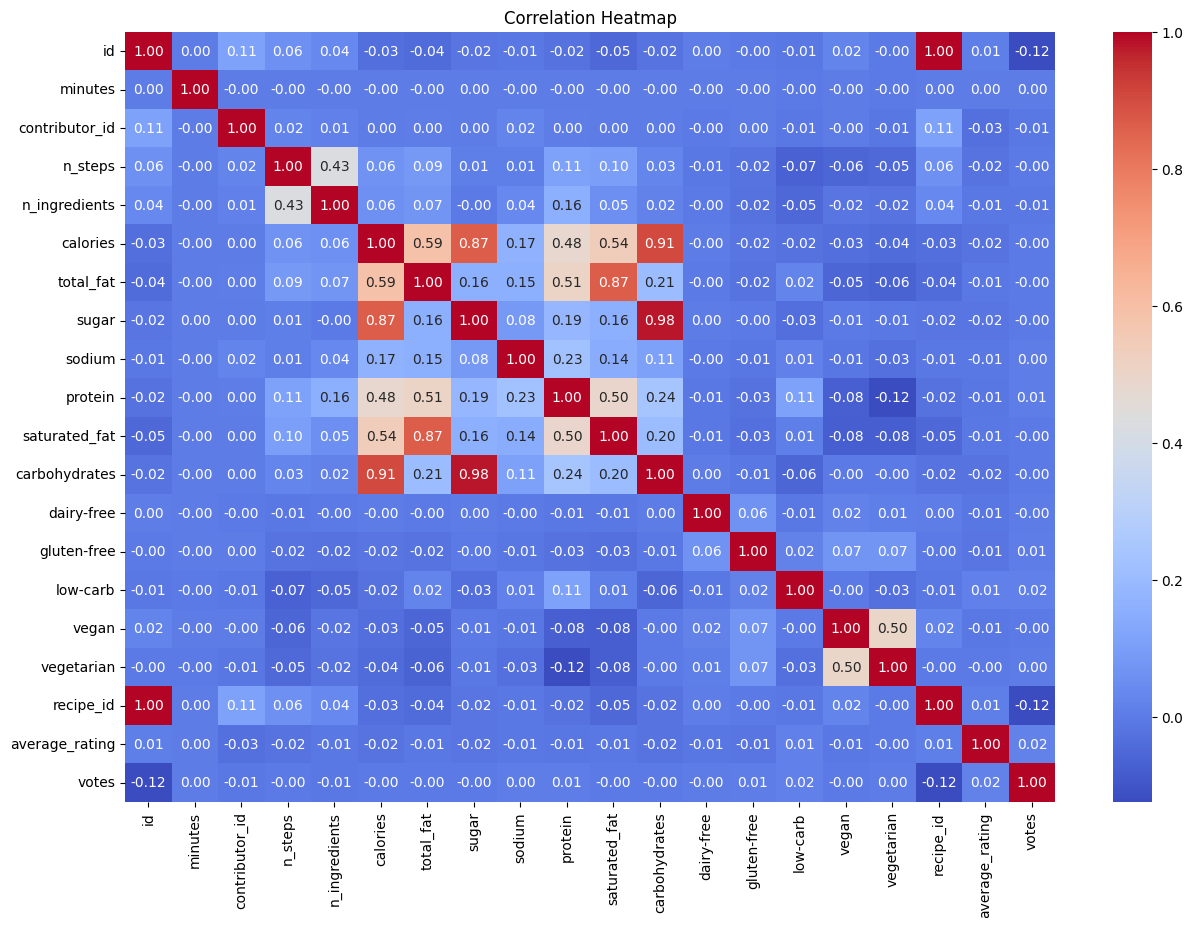

In [34]:
# Correlation Analysis

# Filter numeric columns for correlation analysis
numeric_columns = food_df.select_dtypes(include=['float64', 'int64'])

# Heatmap for correlation matrix
plt.figure(figsize=(15, 10))
sns.heatmap(numeric_columns.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()


- High Positive Correlation:

 calories and sugar (0.87), indicating recipes with higher calories often have higher sugar content.
 calories and total_fat (0.59), as well as saturated_fat and total_fat (0.87), highlighting the link between fat content and caloric value.
 carbohydrates and sugar (0.91), showing that sugar contributes significantly to carbohydrates.

- Low or Negligible Correlation:

  Features like votes, average_rating, and minutes have minimal correlation with most other features, suggesting they are independent.

- Neutral Relationship:

  Categorical features like vegan, vegetarian, and gluten-free show little to no correlation with numeric features.

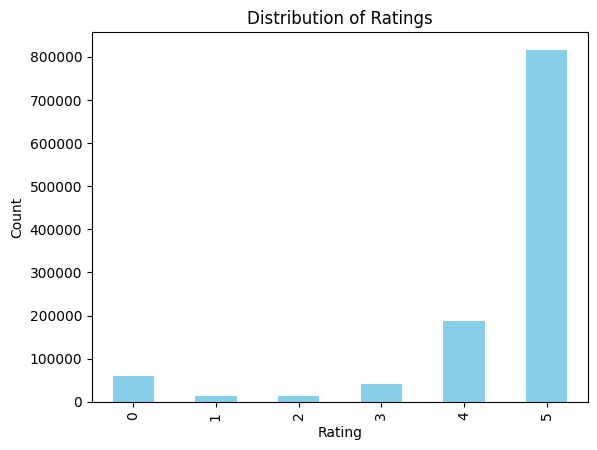

In [35]:
# User Engagement Analysis

users_df['rating'].value_counts().sort_index().plot(kind='bar', color='skyblue')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.title('Distribution of Ratings')
plt.show()


users who are satisfied with recipe give more rating  & users who are dissatisfied with a recipe are less inclined to leave a rating

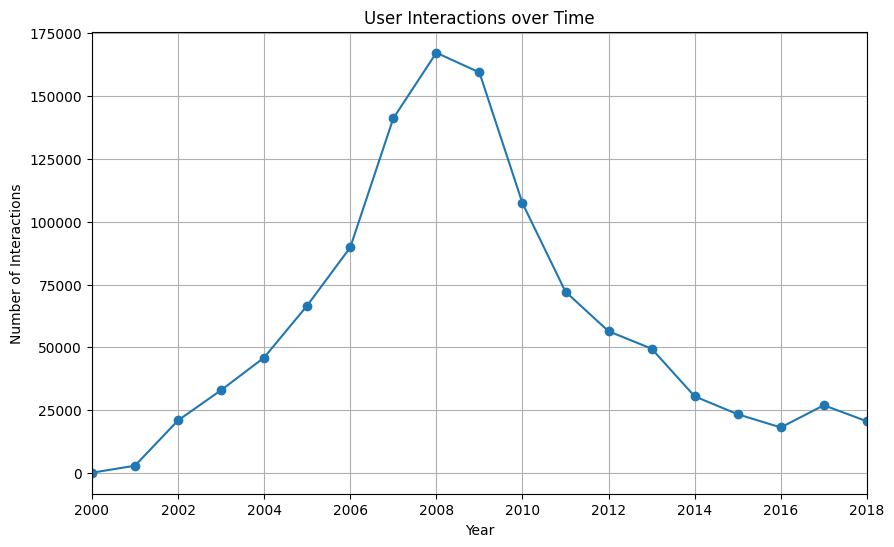

In [36]:
# User Interaction over time
yearly_interaction_counts = users_df['year'].value_counts().sort_index()
plt.figure(figsize=(10, 6))
plt.plot(yearly_interaction_counts.index, yearly_interaction_counts.values, marker='o')
plt.xlabel('Year')
plt.ylabel('Number of Interactions')
plt.title('User Interactions over Time')
plt.xlim(2000,2018)
plt.grid(True)
plt.show()

The service grew steadily from 2000 and became super popular in 2008. Then people started using it less and less, and by 2018 very few people were still using it.

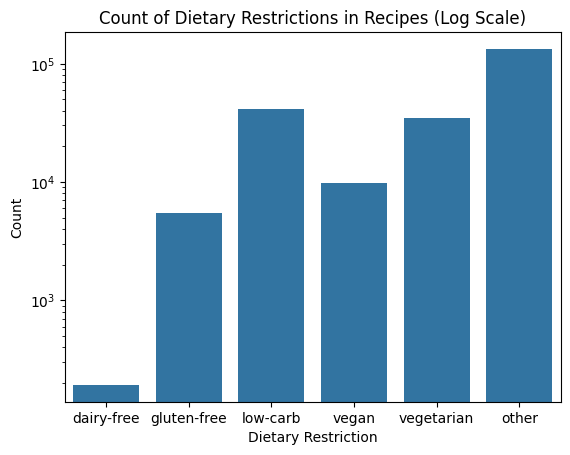

In [37]:
# Calculate the count of recipes for each dietary restriction
dietary_restrictions = ['dairy-free', 'gluten-free', 'low-carb', 'vegan', 'vegetarian']
restriction_counts = recipe_df[dietary_restrictions].sum()

# Add 'none' category when all diet types are 0
restriction_counts['other'] = len(recipe_df) - restriction_counts.sum()

# Plot bar chart of dietary restriction counts with log scale
sns.barplot(x=restriction_counts.index, y=restriction_counts.values)
plt.xlabel('Dietary Restriction')
plt.ylabel('Count')
plt.yscale('log')
plt.title('Count of Dietary Restrictions in Recipes (Log Scale)')
plt.show()

"Other" dietary restrictions are most common with over 100,000 recipes. Low-carb, vegetarian, and gluten-free diets each have thousands of recipes, while dairy-free has the fewest with only a few hundred recipes.

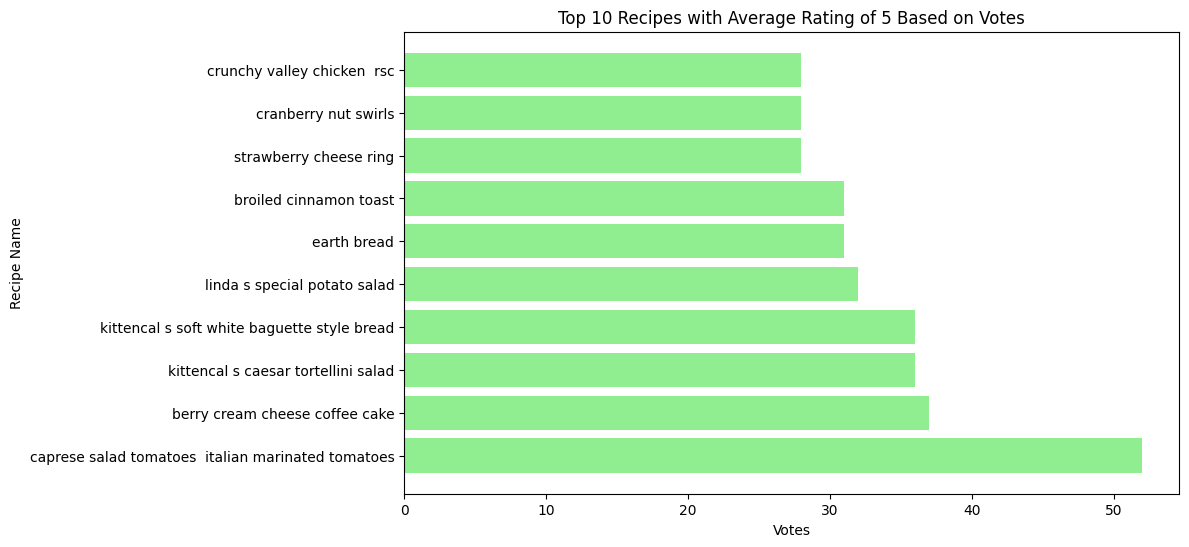

In [38]:
# Popular Recipes

filtered_recipes = food_df[food_df['average_rating'] == 5]
top_recipes = filtered_recipes.sort_values(by='votes').tail(10)

plt.figure(figsize=(10, 6))
plt.barh(top_recipes['name'], top_recipes['votes'], color='lightgreen')
plt.xlabel('Votes')
plt.ylabel('Recipe Name')
plt.title('Top 10 Recipes with Average Rating of 5 Based on Votes')
plt.gca().invert_yaxis()
plt.show()

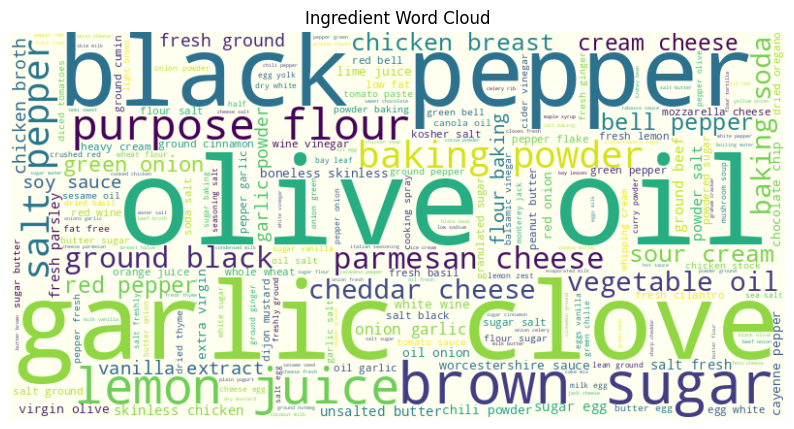

In [39]:
# Ingredient Analysis
from wordcloud import WordCloud

# Concatenate all ingredients into a single string
ingredients_text = ' '.join(recipe_df['ingredients'].explode().str.replace("'", ""))

# Create a WordCloud object with an off-white background color
wordcloud = WordCloud(width=800, height=400, background_color='ivory').generate(ingredients_text)

# Display the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Ingredient Word Cloud')
plt.show()

This ingredient word cloud visually represents the most common ingredients in what appears to be a recipe database or cookbook collection. The most prominent ingredients shown are:

- Basic cooking essentials: "salt", "olive oil", "sugar", "brown sugar"
- Common vegetables: "garlic", "black pepper", "bell pepper"
- Baking ingredients: "baking powder", "baking soda", "flour"
- Protein sources: "chicken breast", "chicken"
- Dairy products: "parmesan cheese", "sour cream"
- Flavorings: "lemon juice", "vanilla extract"

# Content Based Recommendation
- A content-based system recommends recipes similar to a given one based on features like ingredients, tags, and nutritional content

In [40]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# Take a sample of the data f
food_sample = food_df.sample(n=20000, random_state=42).reset_index(drop=True)

# Combine relevant text features
food_sample['combined_features'] = (
    food_sample['tags'].astype(str) +
    food_sample['ingredients'].astype(str) +
    food_sample['description'].fillna('')
)

# TF-IDF vectorization
tfidf = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf.fit_transform(food_sample['combined_features'])

# Cosine similarity
cosine_sim = cosine_similarity(tfidf_matrix)

# Recommendation function
def recommend_recipes(recipe_name, top_n=5):
    # Find the index of the given recipe name in the sample
    try:
        idx = food_sample[food_sample['name'] == recipe_name].index[0]
    except IndexError:
        return "Recipe not found in the sample data."

    # Calculate similarity scores for the selected recipe
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Get indices of the top N most similar recipes
    sim_indices = [i[0] for i in sim_scores[1:top_n+1]]
    return food_sample.iloc[sim_indices][['name', 'tags', 'average_rating']]

In [52]:
# Example
recommended_recipes = recommend_recipes(recipe_name="zydeco spice mix", top_n=5)
print(recommended_recipes)

                                     name  \
16686                easy greek seasoning   
1195   italian seasoning   old sub sailor   
11027            ranch salad dressing mix   
19000         papa john s pizza seasoning   
19307       savory beef or pork roast rub   

                                                    tags  average_rating  
16686  ['15-minutes-or-less', 'time-to-make', 'course...        5.000000  
1195   ['15-minutes-or-less', 'time-to-make', 'course...        4.625000  
11027  ['15-minutes-or-less', 'time-to-make', 'course...        5.000000  
19000  ['15-minutes-or-less', 'time-to-make', 'course...        3.000000  
19307  ['15-minutes-or-less', 'time-to-make', 'course...        4.833333  


# Collaborative Filtering Recommendation System
- This approach recommends recipes based on user interaction, such as ratings or preferences.

In [54]:
from surprise import SVD, Dataset, Reader
from surprise.model_selection import train_test_split

# Taking a sample of the data
food_sample = food_df.sample(n=20000, random_state=42).reset_index(drop=True)

# Prepare data for collaborative filtering
reader = Reader(rating_scale=(0, 5))
data = Dataset.load_from_df(food_sample[['contributor_id', 'recipe_id', 'average_rating']], reader)
trainset, testset = train_test_split(data, test_size=0.2)

# Train the SVD model
model = SVD()
model.fit(trainset)

# Recommendation function for a user
def recommend_for_user(user_id, top_n=5):
    # Get all unique recipe IDs
    all_recipes = food_sample['recipe_id'].unique()

    # Predict ratings for all recipes
    predictions = []
    for recipe_id in all_recipes:
        pred = model.predict(user_id, recipe_id).est
        predictions.append((recipe_id, pred))

    # Sort recipes by predicted rating
    predictions = sorted(predictions, key=lambda x: x[1], reverse=True)
    top_recipe_ids = [recipe_id for recipe_id, _ in predictions[:top_n]]

    # Get recipe details for the top N recommendations
    recommended_recipes = food_sample[food_sample['recipe_id'].isin(top_recipe_ids)]
    return recommended_recipes[['name', 'average_rating']]

In [56]:
# Example
user_id = 137739
recommended_recipes = recommend_for_user(user_id, top_n=5)
print(recommended_recipes)

                                                  name  average_rating
2165                                 black jamun raita             5.0
7568                       gobhi cauliflower  musallam             5.0
15519  charishma s jasmine and brown rice with veggies             5.0
16186                                 california rolls             5.0
17144                   chocolate orange hazelnut bark             5.0
